# Market Prices Research Report

## Background Information



Retailer of sport nutrition in Israel wants to build a price strategy based on competitive research.

In highly competitive market it's very important to monitor competitor's prices. 

It helps to adapt the price of their products in time and to be aware of what competitors are doing.

A client wants to get data-driven decision (market prices changes) based on competitors monthly report.

## Research flow step-by-step

1. Competitors identification and classification
2. Data collection: campaigns, websites, products and other public information
3. Data analysis: gathering products information
4. Drawing conclusions
5. Summary with recommendations

### 1. Competitors identification and classification

During research and classification 12 major competitors were identified.

The source names has been changed.

### 2. Data collection: campaigns, websites, products and other public information

For further analysis we used inventory data from competitor's websites (public information).

In [1]:
import pandas as pd
import glob
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


### 3. DATA ANALYSIS

#### Data gathering and processing

The data was collected once a month, for 7 months and compiled as .xlsx spreadsheets.

The spreadsheet format: _product name_, _sale price_, _product brand_, _category_, _source_, _month_.

For the report only `sale price`, `category`, `source` and `month` fields are used.

Where:
 - sale price: current product price (with discount)
 - source: competitor
 - category: product category (protein bars, protein powders, creatine, ...)
 - month: data gathering month

The goal of this research is to learn the price changes for each product category among competitors.
-

Data loading and prossesing.

All the data stored in dataframe that was generated during data gathering and parsing processes.


In [2]:
df = pd.read_excel('ALL_PRICES.xlsx')
df

,name,sale_price,brand,category,source,month
0,אבקת חלבון Whey Shake | וואי שייק 2.3 קילו + ח...,259,סינטרקס | SYNTRAX,protein-powders,source3,3
1,"אבקת חלבון Whey Blend | וואי בלנד 2.3 ק""ג בטעם...",199,רול וואן | RULE ONE,protein-powders,source3,3
2,"אבקת חלבון Trophix | טרופיקס 2.3 ק""ג",299,סינטרקס | SYNTRAX,protein-powders,source3,3
3,אבקת חלבון Micellar Creme | קזאין מיסלרי 907 גרם,189,סינטרקס | SYNTRAX,protein-powders,source3,3
4,אבקת חלבון Whey Isolate & Hydrolyzed | איזולט ...,365,רול וואן | RULE ONE,protein-powders,source3,3
...,...,...,...,...,...,...
15336,אמינו אנרג’י Zero With Electrolytes ג”ר 360,180,NaN,amino,client,11
15337,חומצת אמינו CREATINE MONOHYDRATE ג”ר 300,180,NaN,creatine,client,11
15338,40 מנות BCAA ZERO,180,NaN,amino,client,11
15339,Beta Alanine 300 g,120,NaN,amino,client,11


In [3]:
# Grouping data by source, category, month & average sale price to show the price differences
grouped_df = round(df.groupby(['source','category','month']).mean(),0)
grouped_df = grouped_df.reset_index()

# Calculate price differences for each category
grouped_df['price_diff_prc_cat'] = grouped_df.groupby(['source', 'category'])['sale_price'].pct_change().fillna(0)
grouped_df['price_diff_cat'] = grouped_df.groupby(['source','category'])['sale_price'].diff().fillna(0)

In [4]:
# Average sale_price for each source
grouped_source = grouped_df.groupby('source')['sale_price'].mean().sort_values()

grouped_source

source
source1     151.518519
source2     154.203704
source3     161.777778
source5     162.444444
source6     166.833333
source4     173.952381
source7     195.225000
source11    195.479167
source8     201.222222
source9     214.200000
source10    216.880952
client      224.111111
Name: sale_price, dtype: float64

In [5]:
# Top-5 of sources by price for each category
grouped_source = grouped_df.groupby(['category','source'])['sale_price'].max().reset_index()
protein_powders = grouped_source[grouped_source['category'] == 'protein-powders'].sort_values(by = ['sale_price'])
gainer_powders = grouped_source[grouped_source['category'] == 'gainer-powders'].sort_values(by = ['sale_price'])
creatine = grouped_source[grouped_source['category'] == 'creatine'].sort_values(by = ['sale_price'])
amino = grouped_source[grouped_source['category'] == 'amino'].sort_values(by = ['sale_price'])
protein_bar = grouped_source[grouped_source['category'] == 'protein-bars'].sort_values(by = ['sale_price'])

top_category = grouped_source.set_index('source').groupby('category')['sale_price'].apply(lambda grp: grp.nlargest(5)).reset_index()

In [6]:
# Average sale_price for each category
grouped_category = round(grouped_df.groupby('category')['sale_price'].mean().sort_values(),2)

## Visualization of price differences during research period

### 1. According to the source (source = competitor's website)

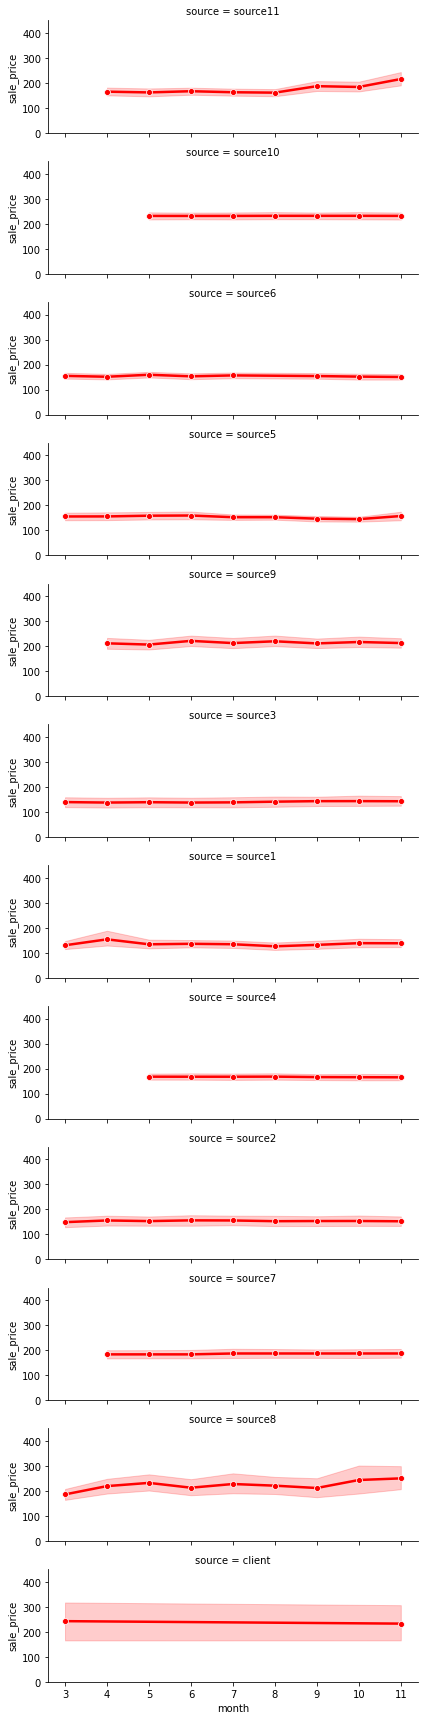

In [7]:
# Visualization of average sale price for each source by months
ordered_source = df.source.value_counts().index
g = sns.FacetGrid(df, row="source", row_order=ordered_source, sharey = False,
                  height=2, aspect=3)
g.map_dataframe(sns.lineplot,x ="month", y = 'sale_price', linewidth=2.5, color='r', marker="o")
g.set(ylim=(0,450))

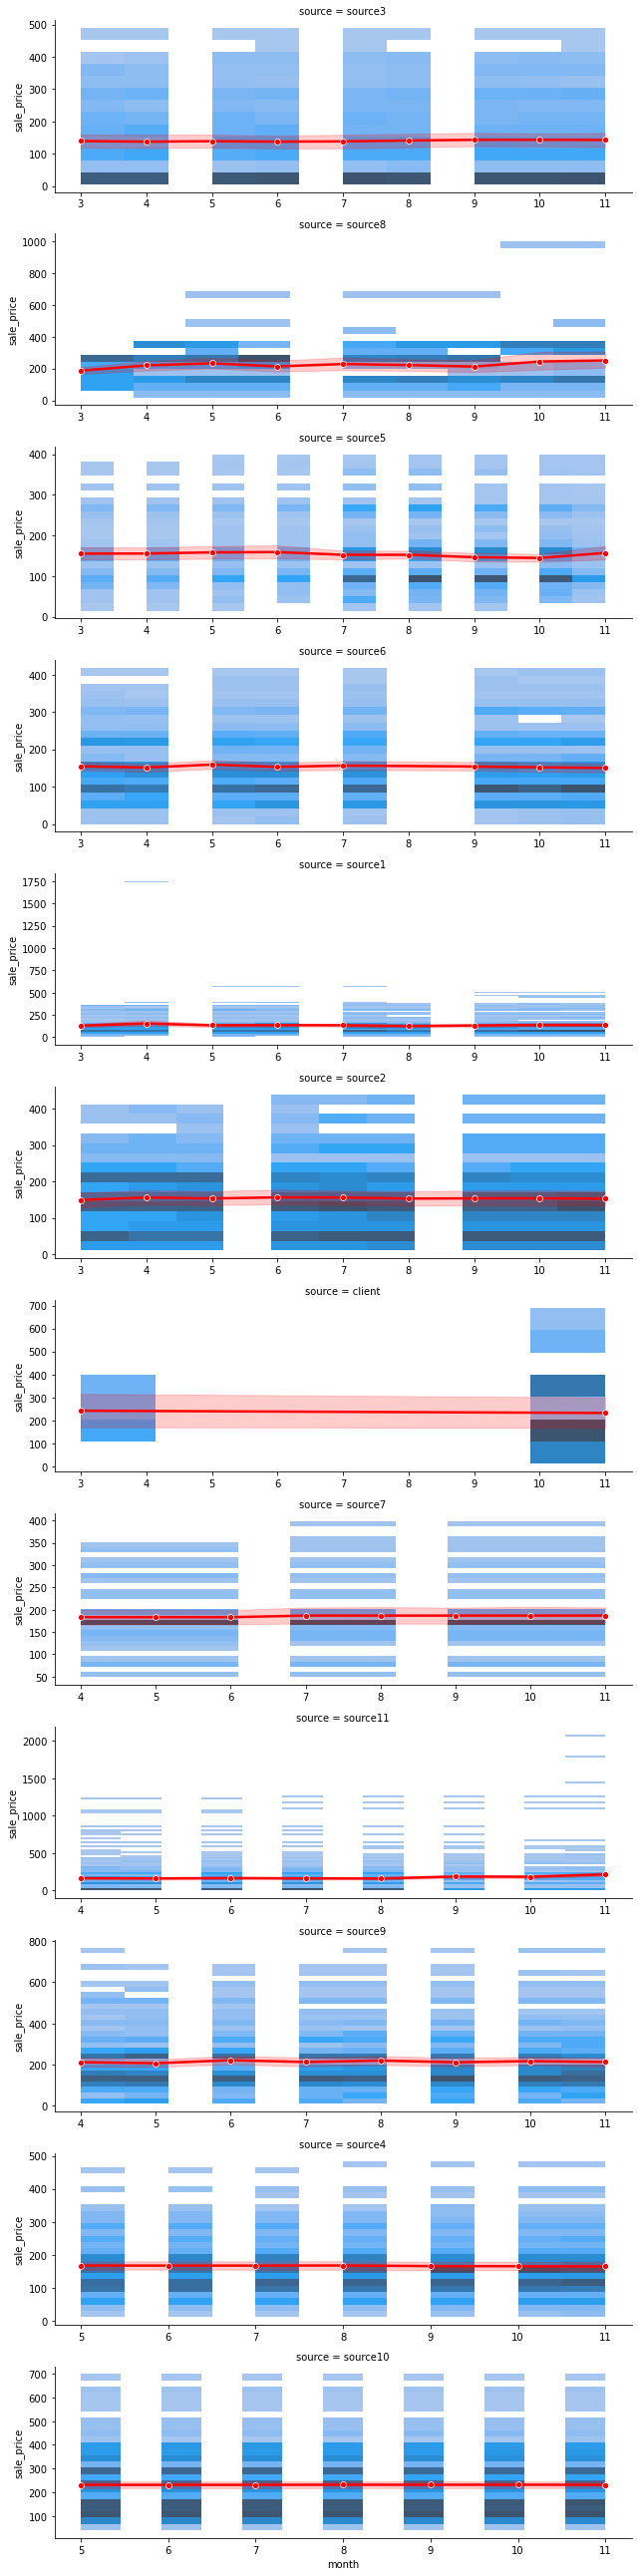

In [8]:
# A few more graphs to show the general picture for each source
g = sns.FacetGrid(df, row="source", sharex=False, sharey=False, height=3, aspect=3)
g.map_dataframe(sns.histplot,x ="month", y = 'sale_price')
g.map_dataframe(sns.lineplot,x ="month", y = 'sale_price', linewidth=2.5, color='r', marker="o")


### 2. According to the product category

In [9]:
grouped_diff = round(grouped_df.groupby('category')['price_diff_prc_cat'].mean()*100, 1)
print("% of price change by", grouped_diff)

% of price change by category
amino                    2.8
creatine                 1.1
gainer-powders           1.1
protein-bars             1.5
protein-powders          0.5
vitamins and minerals    0.8
Name: price_diff_prc_cat, dtype: float64


In [10]:
top_category

,category,source,sale_price
0,amino,source11,350.0
1,amino,source10,201.0
2,amino,source9,182.0
3,amino,source6,162.0
4,amino,client,160.0
5,creatine,source11,196.0
6,creatine,source7,178.0
7,creatine,source3,163.0
8,creatine,source1,149.0
9,creatine,source9,148.0


#### Build a lineplots to show price dynamic for each category and source

Price changes by category for each source


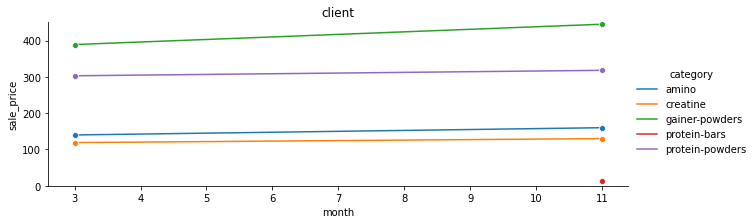

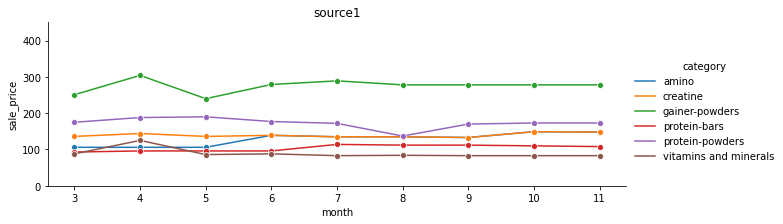

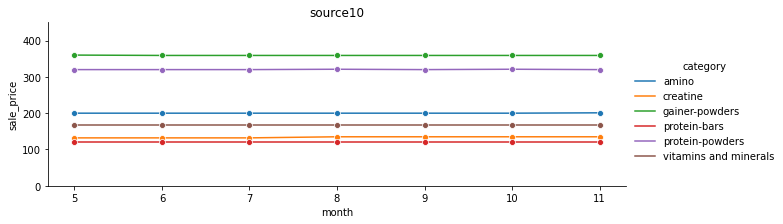

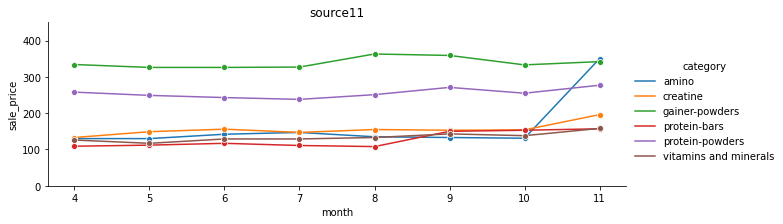

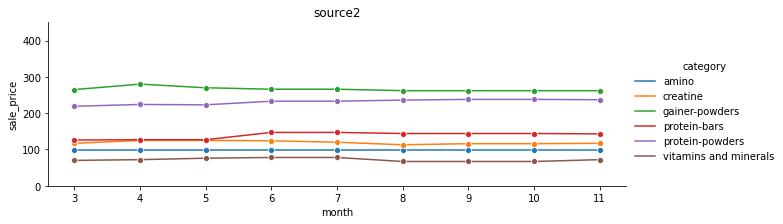

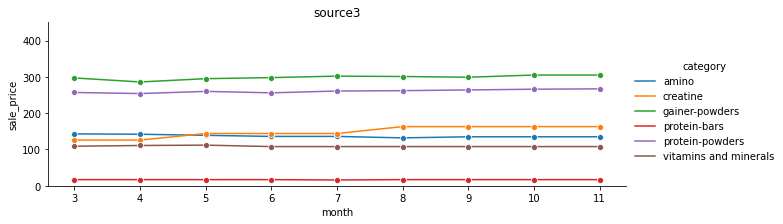

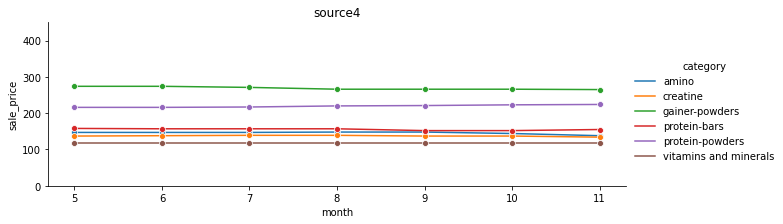

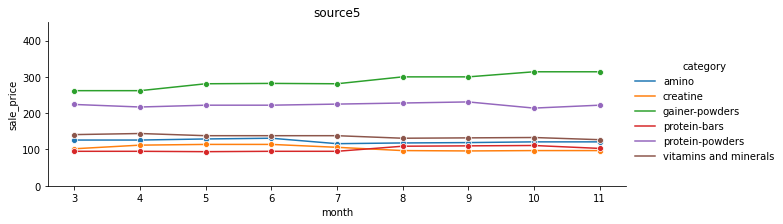

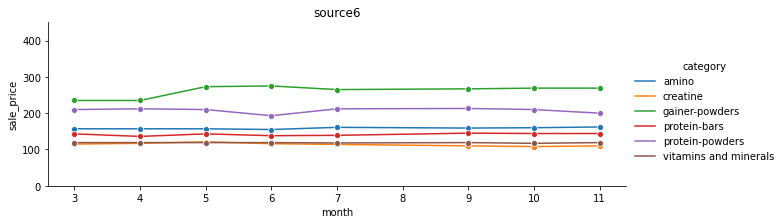

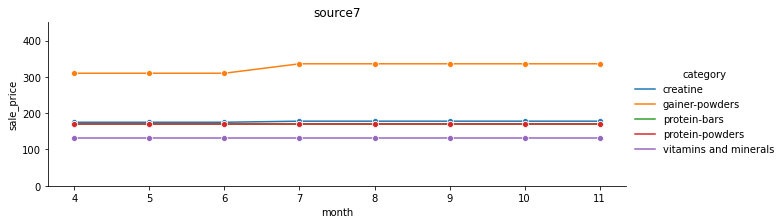

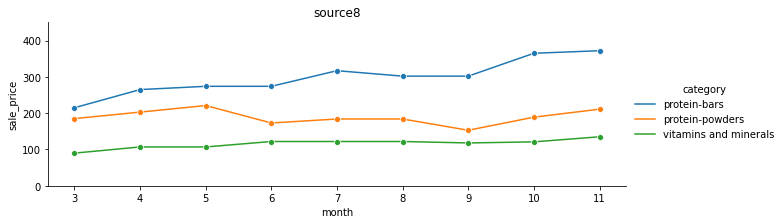

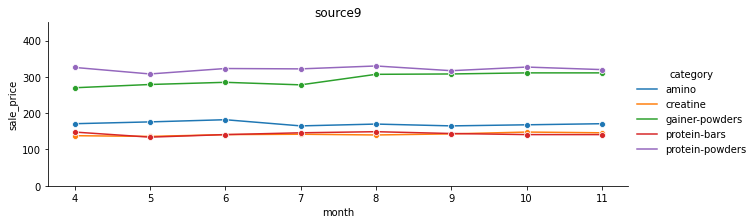

In [11]:
import math
source_list = grouped_df['source'].unique()


for link in source_list:
    new_df = grouped_df[grouped_df['source'] == link]
    temp_g = sns.relplot(x='month', y='sale_price', hue='category', data=new_df, kind='line',height=3, aspect=3, marker="o",ci=None).set(title=link)
    temp_g.set(ylim=(0,450))
print("Price changes by category for each source")


#### Build a graph to show prices dynamics for each category by all sources.
All categories have tend to price increase.

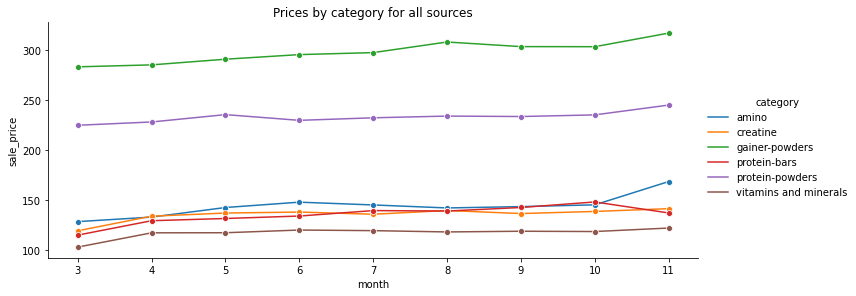

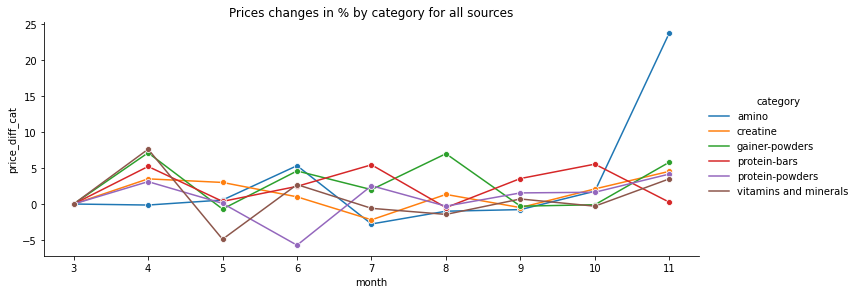

In [12]:

sns.relplot(x='month', y='sale_price', hue='category', data=grouped_df, kind='line',height=4, aspect=2.5,ci=None, marker="o").set(title= 'Prices by category for all sources')
sns.relplot(x='month', y='price_diff_cat', hue='category', data=grouped_df, kind='line',height=4, aspect=2.5,ci=None, marker="o").set(title= 'Prices changes in % by category for all sources')


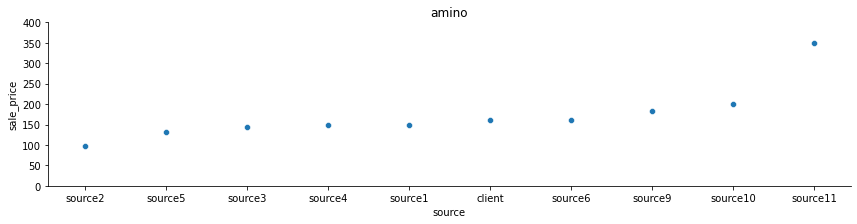

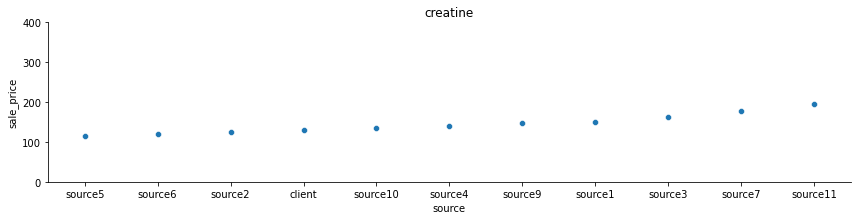

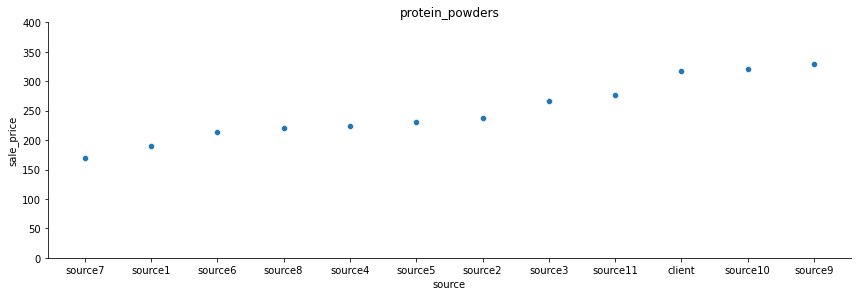

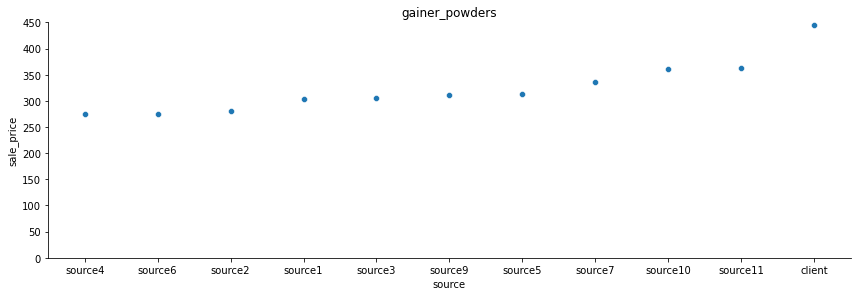

In [13]:
sns.relplot(x='source', y='sale_price', data=amino, kind='scatter',height=3, aspect=4, marker="o",ci=None).set(ylim = (0,400),title='amino')
sns.relplot(x='source', y='sale_price', data=creatine, kind='scatter',height=3, aspect=4, marker="o",ci=None).set(ylim = (0,400),title='creatine')
sns.relplot(x='source', y='sale_price', data=protein_powders, kind='scatter',height=4, aspect=3, marker="o",ci=None).set(ylim = (0,400),title='protein_powders')
sns.relplot(x='source', y='sale_price', data=gainer_powders, kind='scatter',height=4, aspect=3, marker="o",ci=None).set(ylim = (0,450),title='gainer_powders')


## 4. Conclusions


1. We can see the results of price differences analysis according to the product categories. 
   
   Prices raised in categories:

        amino                    1.9%

        creatine                 0.8%

        gainer-powders           1.1%

        protein-bars             1.5%

        protein-powders          0.5%

        vitamins and minerals    1.4%


2. The most of competitors stay on the same level of prices in general during research period

3. Sources with the highest average price:

        source9         206.47

        source11        209.87

        source10        217.75

        client          221.22

4. Categories with the highest average price:

        protein powders          237.12

        gainer powders           296.42


5. Source "client" has a highest price in only one category - "gainer powders".

   Also, it has a highest average price for all products together in comparison with others (because of gainer powders).

## 5. Recommendations

1. __Overall, a client can increase the price for all categories by 0.5 percent with no risk, except gainer powders__

2. __There is a need to keep tracking price changes and analyse them for more accurate client price changes:__

    _protein powders_, _amino_, _creatine_

3. __Client's source is profitable for the customers in categories__

    _protein-powders_, _amino_, _creatine_, _protein-bars_, _vitamins and minerals_
    
    because client is out of the top-5 for the price, it's recommended to focus on promotion for products of these categories